In [1]:
import pandas as pd
import pickle as pkl
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from multiprocessing import Pool

## Building a graph

In [2]:
with open ('data/drug_target_interactions.pkl', 'rb') as f:
    drug_target_interactions = pkl.load(f)

In [3]:
drug_target_interactions.head()

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism
0,138068-37-8,DB00001,Lepirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human
1,205923-56-4,DB00002,Cetuximab,[antagonist],>lcl|BSEQ0001530|Epidermal growth factor recep...,>lcl|BSEQ0019007|Epidermal growth factor recep...,BE0000767,Epidermal growth factor receptor,Human
2,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0010635|Low affinity immunoglobulin g...,>lcl|BSEQ0010636|Low affinity immunoglobulin g...,BE0000901,Low affinity immunoglobulin gamma Fc region re...,Human
3,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011518|Complement C1r subcomponent\n...,>lcl|BSEQ0011519|Complement C1r subcomponent (...,BE0002093,Complement C1r subcomponent,Human
4,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0016678|Complement C1q subcomponent s...,>lcl|BSEQ0016679|Complement C1q subcomponent s...,BE0002094,Complement C1q subcomponent subunit A,Human


In [4]:
drug_target_interactions_graph = nx.from_pandas_edgelist(drug_target_interactions[['drug_id', 'target_id']],
                                                         source = 'drug_id', target = 'target_id',
                                                         edge_attr = True)

In [5]:
drug_target_interactions_graph

In [6]:
nx.is_connected(drug_target_interactions_graph)

False

## Seems like the graph is not fully connected. Inspecting smaller connected components

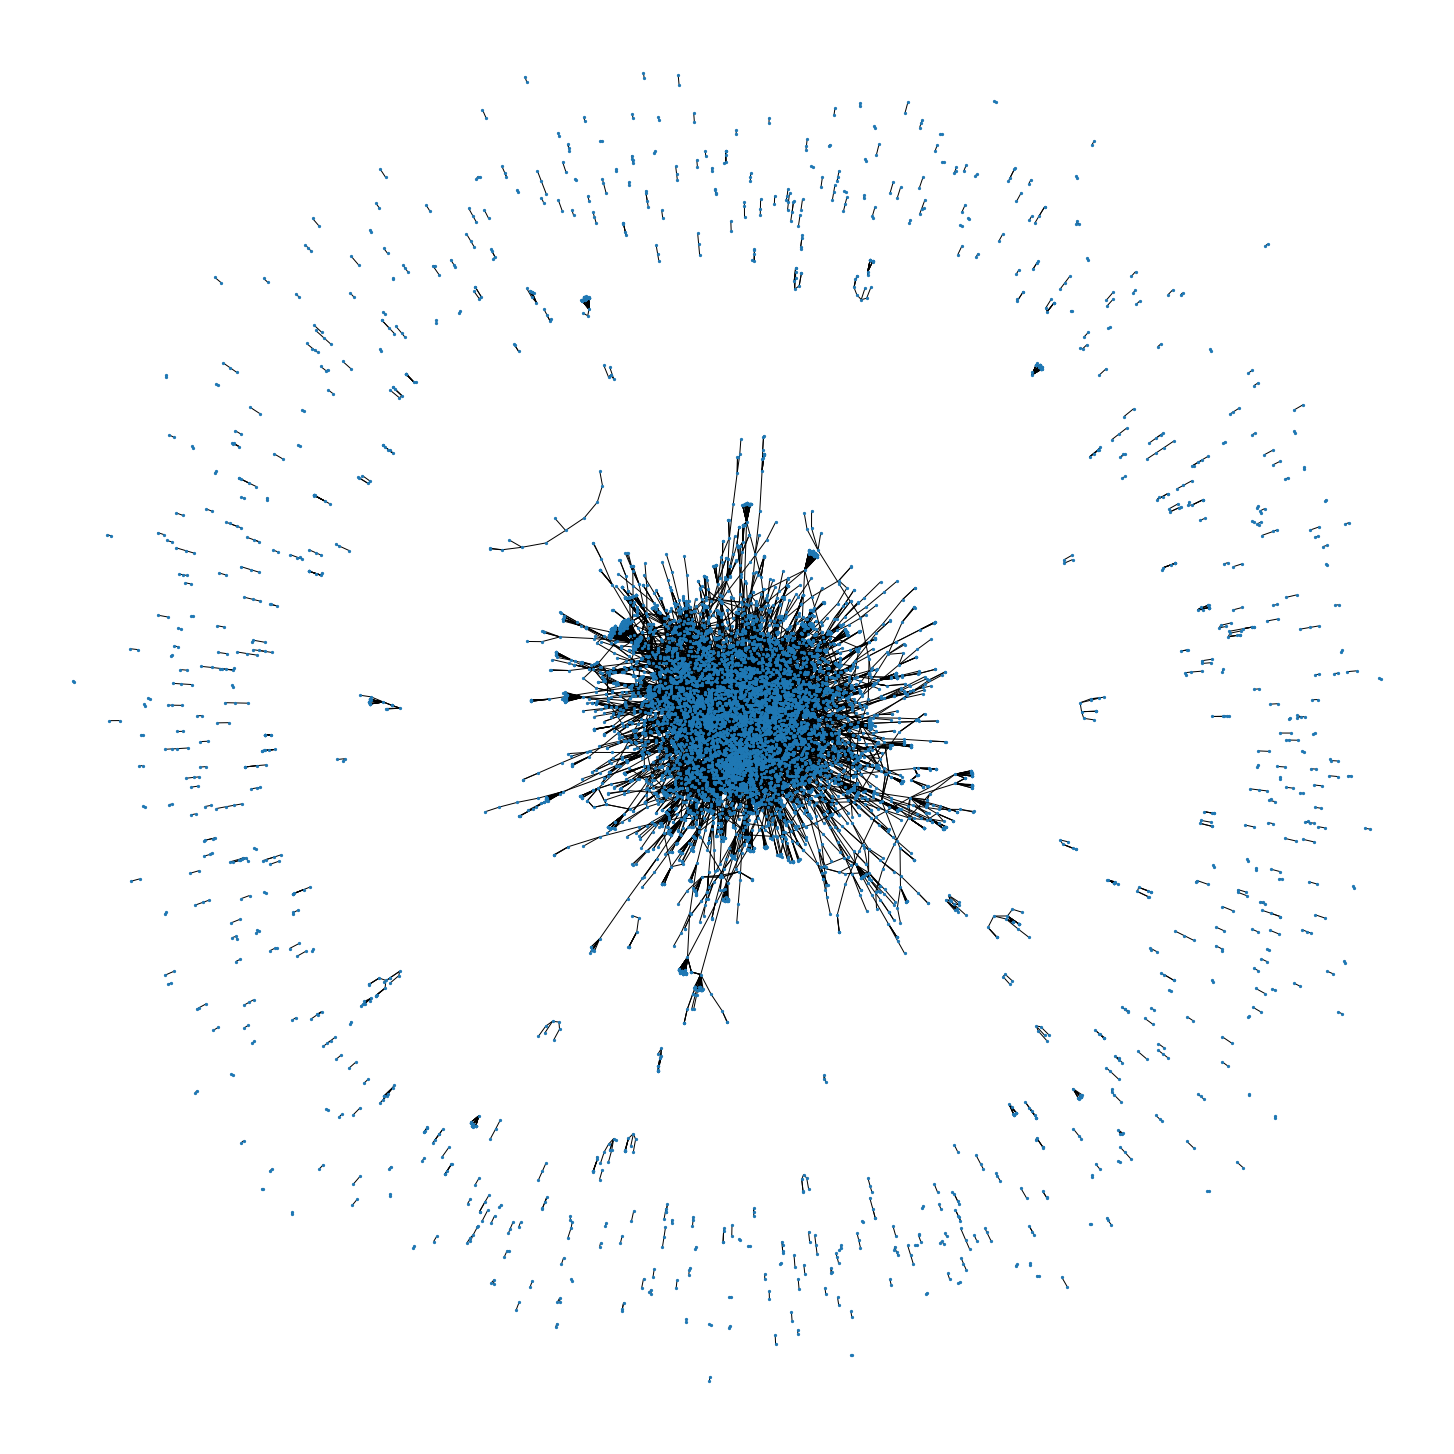

In [7]:
plt.figure(figsize = (20, 20))
nx.draw_spring(drug_target_interactions_graph, node_size = 5)

In [8]:
list(nx.connected_components(drug_target_interactions_graph))

[{'DB07179',
  'DB02653',
  'DB06710',
  'DB00533',
  'DB04696',
  'DB07433',
  'BE0000708',
  'DB03747',
  'DB07793',
  'DB02986',
  'BE0000395',
  'DB00007',
  'DB04474',
  'BE0003836',
  'BE0000061',
  'DB01745',
  'BE0000964',
  'BE0004653',
  'DB11601',
  'DB01412',
  'BE0001063',
  'DB01676',
  'DB08663',
  'DB00800',
  'DB01897',
  'DB03818',
  'DB06923',
  'DB01783',
  'BE0002077',
  'BE0001024',
  'DB04970',
  'DB01904',
  'DB02883',
  'DB00376',
  'DB04924',
  'DB09130',
  'BE0003038',
  'DB04076',
  'DB00028',
  'DB01427',
  'BE0001706',
  'BE0001274',
  'DB00911',
  'BE0004664',
  'DB07043',
  'BE0003022',
  'DB03717',
  'BE0003342',
  'DB07895',
  'BE0004246',
  'DB01440',
  'DB08247',
  'DB05467',
  'DB05448',
  'DB01277',
  'DB08550',
  'DB02336',
  'BE0004430',
  'DB04241',
  'DB08568',
  'DB03399',
  'DB07222',
  'DB00725',
  'BE0002353',
  'DB01354',
  'DB04988',
  'DB06981',
  'BE0000464',
  'BE0002123',
  'BE0002358',
  'DB02299',
  'DB01940',
  'BE0003742',
  'DB08

<BarContainer object of 578 artists>

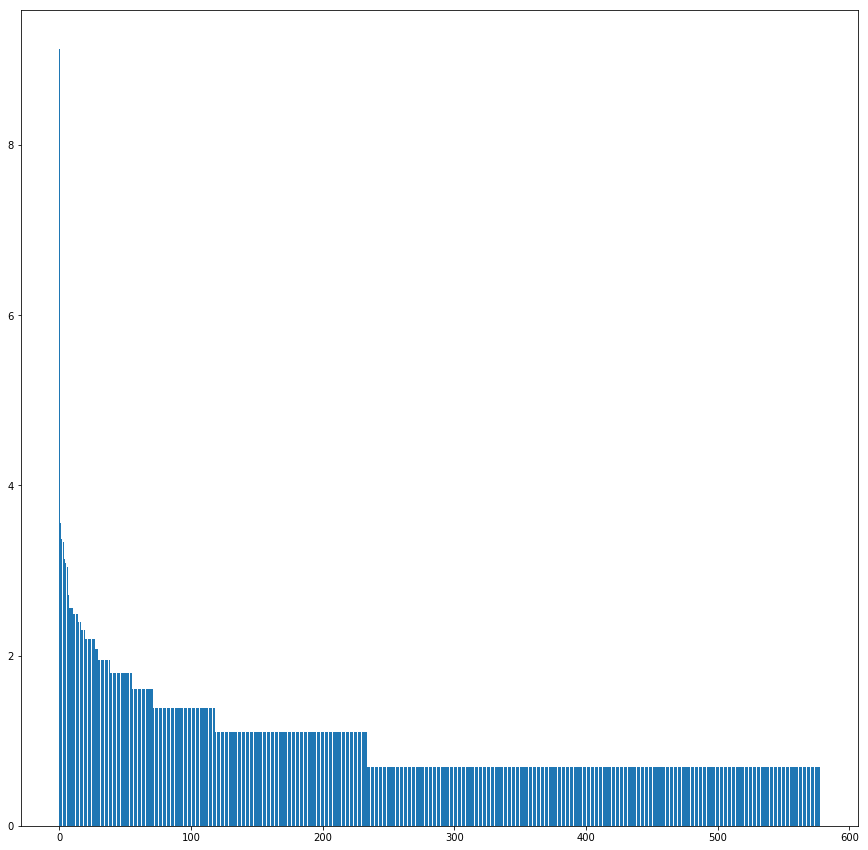

In [9]:
connect_components_list = [len(n) for n in nx.connected_components(drug_target_interactions_graph)]
plt.figure(figsize = (15, 15))
plt.bar(range(len(connect_components_list)), sorted(np.log(connect_components_list), reverse = True))

### Seems like there is one huge component and several smaller components. Taking a look at the largest component first

In [10]:
drug_target_interactions_major = list(nx.connected_component_subgraphs(drug_target_interactions_graph))[0]

In [11]:
nx.is_connected(drug_target_interactions_major)

True

## Converting to NetworkX recommended bipartite format

In [12]:
bottom_nodes, top_nodes = bipartite.sets(drug_target_interactions_major)

In [13]:
[n for n in drug_target_interactions_major.nodes(data=True)]

[('DB07179', {}),
 ('DB04617', {}),
 ('DB02653', {}),
 ('DB06710', {}),
 ('BE0004580', {}),
 ('DB00533', {}),
 ('DB04696', {}),
 ('DB04701', {}),
 ('DB04864', {}),
 ('DB06819', {}),
 ('DB07433', {}),
 ('BE0000578', {}),
 ('DB06213', {}),
 ('DB07602', {}),
 ('DB04163', {}),
 ('DB03308', {}),
 ('BE0001814', {}),
 ('DB04838', {}),
 ('BE0000708', {}),
 ('BE0000166', {}),
 ('DB03747', {}),
 ('BE0004529', {}),
 ('BE0004646', {}),
 ('DB07793', {}),
 ('DB03444', {}),
 ('DB02340', {}),
 ('BE0000469', {}),
 ('BE0004665', {}),
 ('BE0004689', {}),
 ('DB03741', {}),
 ('DB02986', {}),
 ('DB00007', {}),
 ('BE0003711', {}),
 ('DB01283', {}),
 ('DB04474', {}),
 ('BE0003836', {}),
 ('BE0000061', {}),
 ('DB01745', {}),
 ('DB02406', {}),
 ('BE0000964', {}),
 ('BE0004653', {}),
 ('BE0003036', {}),
 ('DB11601', {}),
 ('DB01412', {}),
 ('DB00447', {}),
 ('BE0001063', {}),
 ('DB01676', {}),
 ('DB00800', {}),
 ('DB01897', {}),
 ('DB03818', {}),
 ('DB06923', {}),
 ('DB01535', {}),
 ('DB01783', {}),
 ('DB02024',

In [14]:
drugs_df = drug_target_interactions[['drug_id', 'drug_name', 'drug_cas']].drop_duplicates().set_index('drug_id')
targets_df = drug_target_interactions[['target_id',
                                     'target_amino', 'target_gene',
                                     'target_name']].drop_duplicates().set_index('target_id')



In [15]:
drugs_df['bipartite'] = 0
targets_df['bipartite'] = 1

In [16]:
nodes = drugs_df.to_dict('index')
nodes.update(targets_df.to_dict('index'))

In [17]:
nx.set_node_attributes(drug_target_interactions_major, nodes)

In [18]:
[v for i,v in drug_target_interactions_major.nodes(data = True)]

[{'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '3-((3-bromo-5-o-tolylpyrazolo[1,5-a]pyrimidin-7-ylamino)methyl)pyridine 1-oxide'},
 {'bipartite': 0,
  'drug_cas': nan,
  'drug_name': '(9S)-9-[(8-AMMONIOOCTYL)AMINO]-1,2,3,4,9,10-HEXAHYDROACRIDINIUM'},
 {'bipartite': 0,
  'drug_cas': nan,
  'drug_name': "Delta-Bis(2,2'-Bipyridine)-(5-Methyl-2-2'-Bipyridine)-C2-Adamantane Ruthenium (Ii)"},
 {'bipartite': 0, 'drug_cas': '58-18-4', 'drug_name': 'Methyltestosterone'},
 {'bipartite': 1,
  'target_amino': '>lcl|BSEQ0009501|FAD-linked sulfhydryl oxidase ALR\nMAAPGERGRFHGGNLFFLPGGARSEMMDDLATDARGRGAGRRDAAASASTPAQAPTSDSP\nVAEDASRRRPCRACVDFKTWMRTQQKRDTKFREDCPPDREELGRHSWAVLHTLAAYYPDL\nPTPEQQQDMAQFIHLFSKFYPCEECAEDLRKRLCRNHPDTRTRACFTQWLCHLHNEVNRK\nLGKPDFDCSKVDERWRDGWKDGSCD',
  'target_gene': '>lcl|BSEQ0013200|FAD-linked sulfhydryl oxidase ALR (GFER)\nATGGCGGCGCCCGGCGAGCGGGGCCGCTTCCACGGCGGGAACCTCTTCTTCCTGCCGGGG\nGGCGCGCGCTCCGAGATGATGGACGACCTGGCGACCGACGCGCGGGGCCGGGGCGCGGGG\nCGGAGAGACGCGGCCGCCTCGGCC

In [19]:
top_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' in n}
bottom_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' not in n}

In [88]:
bottom_nodes

{'BE0000041',
 'BE0005841',
 'BE0004444',
 'BE0003824',
 'BE0008700',
 'BE0000474',
 'BE0003797',
 'BE0000870',
 'BE0003697',
 'BE0002346',
 'BE0002687',
 'BE0004885',
 'BE0002596',
 'BE0002688',
 'BE0001360',
 'BE0000906',
 'BE0002374',
 'BE0000717',
 'BE0004311',
 'BE0002127',
 'BE0000542',
 'BE0004138',
 'BE0000148',
 'BE0004207',
 'BE0002217',
 'BE0000133',
 'BE0003041',
 'BE0001684',
 'BE0004172',
 'BE0001432',
 'BE0002313',
 'BE0002093',
 'BE0008670',
 'BE0003783',
 'BE0001358',
 'BE0004120',
 'BE0000630',
 'BE0004507',
 'BE0004489',
 'BE0000840',
 'BE0002678',
 'BE0002037',
 'BE0003385',
 'BE0004148',
 'BE0004090',
 'BE0000019',
 'BE0002066',
 'BE0004892',
 'BE0002473',
 'BE0000177',
 'BE0000214',
 'BE0008705',
 'BE0003642',
 'BE0004430',
 'BE0001863',
 'BE0001705',
 'BE0001959',
 'BE0001583',
 'BE0001842',
 'BE0001727',
 'BE0003124',
 'BE0000707',
 'BE0000680',
 'BE0001910',
 'BE0002391',
 'BE0002160',
 'BE0000633',
 'BE0000488',
 'BE0000816',
 'BE0004234',
 'BE0000645',
 'BE00

## Investigating the structure of the two partite(?)

In [42]:
closeness_centrality_list = nx.bipartite.closeness_centrality(drug_target_interactions_major, top_nodes)
closeness_centrality_df = pd.DataFrame.from_dict(closeness_centrality_list, orient = 'index')

In [83]:
closeness_centrality_df = closeness_centrality_df.sort_values(0)
closeness_centrality_drugs = pd.merge(closeness_centrality_df, drugs_df, left_index = True, right_index = True, how = 'inner')
closeness_centrality_targets = pd.merge(closeness_centrality_df, targets_df, left_index = True, right_index = True, how = 'inner')

In [84]:
closeness_centrality_drugs = closeness_centrality_drugs.rename(columns = {0:'closeness_centrality'})
closeness_centrality_targets = closeness_centrality_targets.rename(columns = {0:'closeness_centrality'})

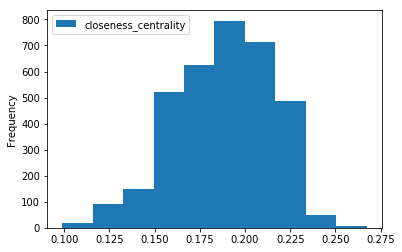

In [85]:
closeness_centrality_targets[['closeness_centrality']].plot.hist('closeness_centrality')

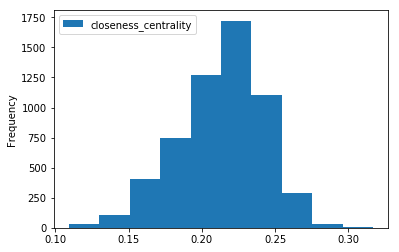

In [86]:
closeness_centrality_drugs[['closeness_centrality']].plot.hist('closeness_centrality')

#### Sanity Check: Drugs with lower rank are very esoteric and ones with high scores are common molecules

In [87]:
closeness_centrality_drugs

,closeness_centrality,drug_name,drug_cas,bipartite
DB13144,0.109102,Lenograstim,135968-09-1,0
DB05249,0.109102,FavId,NaN,0
DB04234,0.109188,N2-({[(4-Bromophenyl)Methyl]Oxy}Carbonyl)-N1-[...,NaN,0
DB03405,0.109188,1-[N[(Phenylmethoxy)Carbonyl]-L-Leucyl-4-[[N/N...,NaN,0
DB08287,0.109188,"(1R,2R)-N-(2-AMINOETHYL)-2-{[(4-METHOXYPHENYL)...",NaN,0
...,...,...,...,...
DB02325,0.303822,Isopropyl Alcohol,67-63-0,0
DB08231,0.305740,MYRISTIC ACID,NaN,0
DB04272,0.309908,Citric Acid,77-92-9,0
DB00157,0.314907,NADH,58-68-4,0


In [21]:
## Serialized Implementation

v = []
u = []
path_delta = []

for edge in tqdm(drug_target_interactions_major.edges()):
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        path_delta.append(nx.shortest_path(drug_target_interactions_major_temp, edge[0], edge[1]))
    except nx.NetworkXNoPath:
        path_delta.append(0)
    
    v.append(edge[0])
    u.append(edge[1])
    
    break

In [22]:
## Parallel implementation

def get_shortest_path_delta(args):
    
    drug_target_interactions_major = args[0]
    edge = args[1]
    
    drug_target_interactions_major_temp = drug_target_interactions_major.copy()
    drug_target_interactions_major_temp.remove_edge(*edge)
    
    try:
        return [nx.shortest_path(drug_target_interactions_major_temp,
                                edge[0], edge[1]), edge[0], edge[1]]
    except nx.NetworkXNoPath:
        return [[0],edge[0], edge[1]]

    
p = Pool(11)
shortest_path_delta = p.map(get_shortest_path_delta,
                            [[drug_target_interactions_major, e] for e in drug_target_interactions_major.edges()])

In [23]:
shortest_path_delta

[[[0], 'DB07179', 'BE0001072'],
 [[0], 'DB04617', 'BE0000426'],
 [[0], 'DB02653', 'BE0001246'],
 [[0], 'DB06710', 'BE0000132'],
 [[0], 'BE0004580', 'DB03147'],
 [[0], 'DB00533', 'BE0001046'],
 [[0], 'DB00533', 'BE0000262'],
 [[0], 'DB04696', 'BE0001438'],
 [[0], 'DB04701', 'BE0001189'],
 [[0], 'DB04864', 'BE0000426'],
 [['DB06819',
   'BE0003783',
   'DB02597',
   'BE0001346',
   'DB02325',
   'BE0001640',
   'DB02448',
   'BE0003768',
   'DB02758',
   'BE0001389'],
  'DB06819',
  'BE0001389'],
 [['DB06819',
   'BE0001389',
   'DB02758',
   'BE0003768',
   'DB02448',
   'BE0001640',
   'DB02325',
   'BE0001346',
   'DB02597',
   'BE0003783'],
  'DB06819',
  'BE0003783'],
 [[0], 'DB07433', 'BE0003758'],
 [['BE0000578', 'DB00157', 'BE0000604', 'DB03461'], 'BE0000578', 'DB03461'],
 [['BE0000578', 'DB03461', 'BE0000194', 'DB00157'], 'BE0000578', 'DB00157'],
 [[0], 'DB06213', 'BE0000924'],
 [[0], 'DB07602', 'BE0000767'],
 [['DB04163', 'BE0001302', 'DB02402', 'BE0004001'], 'DB04163', 'BE0004

In [24]:
shortest_path_delta_df = pd.DataFrame(columns = ['path', 'node_1', 'node_2', 'path_len'])

In [25]:
shortest_path_delta_df['path'] = [p[0] for p in shortest_path_delta]
shortest_path_delta_df['node_1'] = [p[1] for p in shortest_path_delta]
shortest_path_delta_df['node_2'] = [p[2] for p in shortest_path_delta]
shortest_path_delta_df['path_len'] = [len(p[0]) for p in shortest_path_delta]

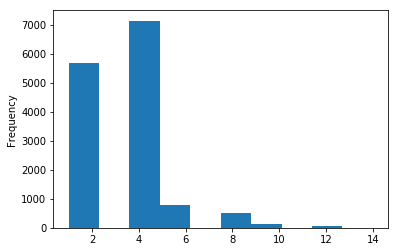

In [26]:
shortest_path_delta_df['path_len'].plot.hist()

In [ ]:
all_pairs_shortest_major = nx.floyd_warshall_numpy(drug_target_interactions_major)

## Todo: Extract the pairs beyond the threshold 4

In [35]:
thresholds = [12, 10, 8, 6, 4]

for threshold in thresholds:
    shortest_path_delta_df.loc[shortest_path_delta_df['path_len'] >= threshold].to_csv('negative_samples/negative_samples_thrsh:' +
                                                                                    str(threshold))
    

In [37]:
thresholds = [12, 10, 8, 6, 4]

for threshold in thresholds:
    print(shortest_path_delta_df.loc[shortest_path_delta_df['path_len'] >= threshold])

                                                    path     node_1  \
227    [BE0001274, DB03801, BE0001258, DB01673, BE000...  BE0001274   
229    [BE0001274, DB02122, BE0004139, DB09060, BE000...  BE0001274   
1530   [DB00171, BE0000014, DB08901, BE0003379, DB004...    DB00171   
1772   [BE0001153, DB02813, BE0001584, DB04404, BE000...  BE0001153   
1773   [BE0001153, DB03861, BE0003196, DB01110, BE000...  BE0001153   
...                                                  ...        ...   
11293  [BE0000896, DB01143, BE0000457, DB00811, BE000...  BE0000896   
12078  [BE0001904, DB02968, BE0001655, DB03530, BE000...  BE0001904   
12556  [BE0002377, DB03352, BE0001321, DB04456, BE000...  BE0002377   
13528  [DB00417, BE0001018, DB00415, BE0003379, DB089...    DB00417   
13987  [BE0004112, DB02494, BE0003753, DB07506, BE000...  BE0004112   

          node_2  path_len  
227      DB02122        12  
229      DB03801        12  
1530   BE0001069        12  
1772     DB03861        12  
17